In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import hockey_rink
from sklearn.metrics import roc_auc_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import requests
import json
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [94]:
standings_url = "https://api-web.nhle.com/v1/standings/now"

# # Send a GET request to the NHL API
teams_response = requests.get(standings_url)
# Parse the response as a dictionary
teams_response_dict = teams_response.json()
print(teams_response_dict)

{'wildCardIndicator': False, 'standings': [{'clinchIndicator': 'p', 'conferenceAbbrev': 'E', 'conferenceHomeSequence': 1, 'conferenceL10Sequence': 4, 'conferenceName': 'Eastern', 'conferenceRoadSequence': 4, 'conferenceSequence': 1, 'date': '2024-04-18', 'divisionAbbrev': 'M', 'divisionHomeSequence': 1, 'divisionL10Sequence': 4, 'divisionName': 'Metropolitan', 'divisionRoadSequence': 1, 'divisionSequence': 1, 'gameTypeId': 2, 'gamesPlayed': 82, 'goalDifferential': 53, 'goalDifferentialPctg': 0.646341, 'goalAgainst': 229, 'goalFor': 282, 'goalsForPctg': 3.439024, 'homeGamesPlayed': 41, 'homeGoalDifferential': 32, 'homeGoalsAgainst': 110, 'homeGoalsFor': 142, 'homeLosses': 11, 'homeOtLosses': 0, 'homePoints': 60, 'homeRegulationPlusOtWins': 27, 'homeRegulationWins': 24, 'homeTies': 0, 'homeWins': 30, 'l10GamesPlayed': 10, 'l10GoalDifferential': 6, 'l10GoalsAgainst': 30, 'l10GoalsFor': 36, 'l10Losses': 3, 'l10OtLosses': 0, 'l10Points': 14, 'l10RegulationPlusOtWins': 5, 'l10RegulationWins'

In [100]:
# Create an empty list to store the team names
team_name_list = []
# Create an empty list to store the team conference
team_conf_list = []
# Create an empty list to store the team division
team_div_list = []
# Create an empty list to store the team goals for
team_GF_list = []
# Create an empty list to store the team goals Against
team_GA_list = []
# Create an empty list to store the team goals Against
team_GDiff_list = []
# Create an empty list to store the team wins
team_wins_list = []
# Create an empty list to store the team losses
team_losses_list = []
# Create an empty list to store the team points
team_points_list = []
# Create an empty list to store the team OT losses
team_OTL_list = []
# Create an empty list to store goal diff pctg
team_GDPerc_list = []
#Create an empty list to store shootout Losses
team_shtoutL_list = []
#Create an empty list to store shootout Wins
team_shtoutW_list = []
#Create an empty list to store regulation wins
team_regwins_list = []
#Create an empty list to store team win percentage
team_winPctg_list =[]
# Create an empty list to store the team division
team_division_list = [] 
#Create an empty list to store team point percentages
team_points_pctg_list = []
#Create an empty list to store home goals for
team_homeGF_list = []
#Create an empty list to store home goals Against
team_homeGA_list = []
#Create an empty list to store home goals Differential
team_homeGFDiff_list = []
#Create an empty list to store home losses
team_homeL_list = []
#Create an empty list to store home OT losses
team_homeOTL_list = []
#Create an empty list to store home points
team_homePoints_list = []
#Create an empty list to store home Reg+OT Wins
team_homeRegOTWins_list = []
#Create an empty list to store home wins
team_homeW_list = []
#Create an empty list to store home reg wins
team_homeRegW_list = []

#Create an empty list to store home goals for
team_roadGF_list = []
#Create an empty list to store home goals Against
team_roadGA_list = []
#Create an empty list to store home goals Differential
team_roadGFDiff_list = []
#Create an empty list to store home losses
team_roadL_list = []
#Create an empty list to store home OT losses
team_roadOTL_list = []
#Create an empty list to store home points
team_roadPoints_list = []
#Create an empty list to store home Reg+OT Wins
team_roadRegOTWins_list = []
#Create an empty list to store home wins
team_roadW_list = []
#Create an empty list to store home reg wins
team_roadRegW_list = []





#Iterate over the teams in the response to get team_ids
for team in teams_response_dict['standings']:
    # Extract the team name
    team_name=team["teamName"]["default"]
    team_name_list.append(team_name)
    team_conf=team["conferenceName"]
    team_conf_list.append(team_conf)
    team_div=team["divisionName"]
    team_div_list.append(team_div)
    team_wins=team['wins']
    team_wins_list.append(team_wins)
    team_losses=team["losses"]
    team_losses_list.append(team_losses)
    team_GF=team["goalFor"]
    team_GF_list.append(team_GF)
    team_GA=team["goalAgainst"]
    team_GA_list.append(team_GA)
    team_GDiff=team["goalDifferential"]
    team_GDiff_list.append(team_GDiff)
    team_points=team['points']
    team_points_list.append(team_points)
    team_OTL=team["otLosses"]
    team_OTL_list.append(team_OTL)
    team_GDiff_perc=team['goalDifferentialPctg']
    team_GDPerc_list.append(team_GDiff_perc)
    team_shtout_L=team["shootoutLosses"]
    team_shtoutL_list.append(team_shtout_L)
    team_shtout_W=team["shootoutWins"]
    team_shtoutW_list.append(team_shtout_W)
    team_regwins=team["regulationWins"]
    team_regwins_list.append(team_regwins)
    team_winPctg=team['winPctg']
    team_winPctg_list.append(team_winPctg)
    team_points_pctg=team['pointPctg']
    team_points_pctg_list.append(team_points_pctg)
    team_homeGF=team['homeGoalsFor']
    team_homeGF_list.append(team_homeGF)
    team_homeGA=team['homeGoalsAgainst']
    team_homeGA_list.append(team_homeGA)
    team_homeGDiff=team['homeGoalDifferential']
    team_homeGFDiff_list.append(team_homeGDiff)
    team_home_losses=team['homeLosses']
    team_homeL_list.append(team_home_losses)
    team_home_OTL=team['homeOtLosses']
    team_homeOTL_list.append(team_home_OTL)
    team_homePoints=team['homePoints']
    team_homePoints_list.append(team_homePoints)
    team_homeRegOTWins=team['homeRegulationPlusOtWins']
    team_homeRegOTWins_list.append(team_homeRegOTWins)
    team_home_wins=team['homeWins']
    team_homeW_list.append(team_home_wins)
    team_homeregWins=team['homeRegulationWins']
    team_homeRegW_list.append(team_homeregWins)

    team_roadGF=team['roadGoalsFor']
    team_roadGF_list.append(team_roadGF)
    team_roadGA=team['roadGoalsAgainst']
    team_roadGA_list.append(team_roadGA)
    team_roadGDiff=team['roadGoalDifferential']
    team_roadGFDiff_list.append(team_roadGDiff)
    team_road_losses=team['roadLosses']
    team_roadL_list.append(team_road_losses)
    team_road_OTL=team['roadOtLosses']
    team_roadOTL_list.append(team_road_OTL)
    team_roadPoints=team['roadPoints']
    team_roadPoints_list.append(team_roadPoints)
    team_roadRegOTWins=team['roadRegulationPlusOtWins']
    team_roadRegOTWins_list.append(team_roadRegOTWins)
    team_road_wins=team['roadWins']
    team_roadW_list.append(team_road_wins)
    team_roadregWins=team['roadRegulationWins']
    team_roadRegW_list.append(team_roadregWins)



    

In [105]:
team_info_dict = {
    'team': team_name_list,
    'conference': team_conf_list,
    'division': team_div_list,
    'wins': team_wins_list,
    'losses': team_losses_list,
    'OTL': team_OTL_list,
    'shootoutLosses':team_shtoutL_list,
    'shootoutWins':team_shtoutW_list,
    'Points':team_points_list,
    'Points_pctg':team_points_pctg_list,
    'RegWins':team_regwins_list,
    'WinPtcg':team_winPctg_list,
    'GF': team_GF_list,
    'GA': team_GA_list,
    'goal_diff': team_GDiff_list,
    'goalDiffPctg': team_GDPerc_list,
    'homeGoalFor': team_homeGF_list,
    'homeGoalAgainst': team_homeGA_list,
    'homeGoalDifferential': team_homeGFDiff_list,
    'homeLossses': team_homeL_list ,
    'homeOTLosses': team_homeOTL_list ,
    'homePoints': team_homePoints_list,
    'homeRegPlusOTWins': team_homeRegOTWins_list,
    'homeWins': team_homeW_list,
    'homeRegWins':  team_homeRegW_list,
    'roadGoalFor': team_roadGF_list ,
    'roadGoalAgainst':team_roadGA_list ,
    'roadGoalDifferential': team_roadGFDiff_list,
    'roadLossses':team_roadL_list,
    'roadOTLosses':team_roadOTL_list,
    'roadPoints':team_roadPoints_list,
    'roadRegPlusOTWins':team_roadRegOTWins_list,
    'roadWins': team_roadW_list,
    'roadRegWins': team_roadRegW_list


}

In [108]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

In [109]:
team_df= pd.DataFrame(team_info_dict)

In [110]:
team_df

,team,conference,division,wins,losses,OTL,shootoutLosses,shootoutWins,Points,Points_pctg,RegWins,WinPtcg,GF,GA,goal_diff,goalDiffPctg,homeGoalFor,homeGoalAgainst,homeGoalDifferential,homeLossses,homeOTLosses,homePoints,homeRegPlusOTWins,homeWins,homeRegWins,roadGoalFor,roadGoalAgainst,roadGoalDifferential,roadLossses,roadOTLosses,roadPoints,roadRegPlusOTWins,roadWins,roadRegWins
0,New York Rangers,Eastern,Metropolitan,55,23,4,3,4,114,0.695122,43,0.670732,282,229,53,0.646341,142,110,32,11,0,60,27,30,24,140,119,21,12,4,54,24,25,19
1,Dallas Stars,Western,Central,52,21,9,2,4,113,0.689024,40,0.634146,298,234,64,0.780488,155,124,31,11,4,56,23,26,16,143,110,33,10,5,57,25,26,24
2,Carolina Hurricanes,Eastern,Metropolitan,52,23,7,5,2,111,0.676829,44,0.634146,279,216,63,0.768293,136,101,35,10,4,58,27,27,22,143,115,28,13,3,53,23,25,22
3,Winnipeg Jets,Western,Central,52,24,6,1,0,110,0.670732,46,0.634146,259,199,60,0.731707,137,98,39,11,3,57,27,27,26,122,101,21,13,3,53,25,25,20
4,Florida Panthers,Eastern,Atlantic,52,24,6,2,3,110,0.670732,42,0.634146,268,200,68,0.829268,129,105,24,13,2,54,24,26,19,139,95,44,11,4,56,25,26,23
5,Vancouver Canucks,Western,Pacific,50,23,9,2,0,109,0.664634,44,0.609756,279,223,56,0.682927,144,99,45,9,5,59,27,27,24,135,124,11,14,4,50,23,23,20
6,Boston Bruins,Eastern,Atlantic,47,20,15,3,4,109,0.664634,36,0.573171,267,224,43,0.524390,138,111,27,11,6,54,22,24,20,129,113,16,9,9,55,21,23,16
7,Colorado Avalanche,Western,Central,50,25,7,2,2,107,0.652439,42,0.609756,304,254,50,0.609756,173,112,61,9,1,63,30,31,27,131,142,-11,16,6,44,18,19,15
8,Edmonton Oilers,Western,Pacific,49,27,6,1,2,104,0.634146,39,0.597561,294,237,57,0.695122,170,106,64,9,4,60,27,28,24,124,131,-7,18,2,44,20,21,15
9,Toronto Maple Leafs,Eastern,Atlantic,46,26,10,2,5,102,0.621951,33,0.560976,303,263,40,0.487805,156,141,15,15,4,48,17,22,12,147,122,25,11,6,54,24,24,21


Have team dataframe full of team data for the 2023-24 season. Going to leverage the pythagorean expectation to see which teams underperformed/overperformed. Pythagorean winning percentage is a formula developed by Baseball statistician Bill James. The concept strives to determine the number of games that a team should have won - based on it total number of runs scored versus its number of runs allowed - in an effort to better forecast that team's future outlook. Here is the original formula, which holds for baseball: Win Ratio= (Runs scored^2) / (Runs scored^2) + (Runs allowed^2). The exponent of 2 is what lends this model its name - it is reminiscent of Pythagoras' theorem, which relates the side lengths of a right-angled triangle. A team whose actual win ratio is greater than this prediction has won more games that it should have, and vice versa. 

For NHL Formula im going to use is: Pythagorean Expectation Win Ratio = (Goals For^2) / (Goals For^2) + (Goals Against^2)

In [111]:
team_df['PythPctg']=(team_df['GF']**2)/ (team_df['GF']**2 + team_df['GA']**2)

Now we have the Pythagorean expectation for each team. Lets Make a plot showing actual Win Percentage vs Pythagorean Expectation. Going to merge in the NHL Logos dataframe I have so I can use logos for the graph

In [130]:
team_df['team'] = team_df['team'].replace('Montréal Canadiens', 'Montreal Canadiens')

In [131]:
nhl_logos= pd.read_csv("nhl_logos.csv")

In [132]:
nhl_logos

,refe_abrName,espn_team_name,espn_logo,primary,secondary,tertiary,quaternary
0,CAR,Carolina Hurricanes,https://a.espncdn.com/i/teamlogos/nhl/500/car.png,#cc0000,#000000,#a2aaad,#76232f
1,CHI,Chicago Blackhawks,https://a.espncdn.com/i/teamlogos/nhl/500/chi.png,#CF0A2C,#FF671B,#00833E,#ffd100
2,CBJ,Columbus Blue Jackets,https://a.espncdn.com/i/teamlogos/nhl/500/cbj.png,#002654,#ce1126,#A4A9AD,NaN
3,DAL,Dallas Stars,https://a.espncdn.com/i/teamlogos/nhl/500/dal.png,#006847,#8F8F8C,#111111,NaN
4,DET,Detroit Red Wings,https://a.espncdn.com/i/teamlogos/nhl/500/det.png,#ce1126,#FFFFFF,NaN,NaN
5,FLA,Florida Panthers,https://a.espncdn.com/i/teamlogos/nhl/500/fla.png,#041E42,#c8102E,#B9975B,NaN
6,NSH,Nashville Predators,https://a.espncdn.com/i/teamlogos/nhl/500/nsh.png,#FFB81C,#041E42,#FFFFFF,NaN
7,TBL,Tampa Bay Lightning,https://a.espncdn.com/i/teamlogos/nhl/500/tb.png,#002868,#FFFFFF,NaN,NaN
8,BOS,Boston Bruins,https://a.espncdn.com/i/teamlogos/nhl/500/bos.png,#FFB81C,#000000,NaN,NaN
9,BUF,Buffalo Sabres,https://a.espncdn.com/i/teamlogos/nhl/500/buf.png,#002654,#FCB514,#ADAFAA,#c8102E


In [133]:
NHL_teams=pd.merge(team_df, nhl_logos, left_on='team',right_on='espn_team_name', how='left')

In [134]:
NHL_teams[['team','WinPtcg','PythPctg','espn_logo']]

,team,WinPtcg,PythPctg,espn_logo
0,New York Rangers,0.670732,0.602614,https://a.espncdn.com/i/teamlogos/nhl/500/nyr.png
1,Dallas Stars,0.634146,0.618585,https://a.espncdn.com/i/teamlogos/nhl/500/dal.png
2,Carolina Hurricanes,0.634146,0.625244,https://a.espncdn.com/i/teamlogos/nhl/500/car.png
3,Winnipeg Jets,0.634146,0.628794,https://a.espncdn.com/i/teamlogos/nhl/500/wpg.png
4,Florida Panthers,0.634146,0.642295,https://a.espncdn.com/i/teamlogos/nhl/500/fla.png
5,Vancouver Canucks,0.609756,0.610183,https://a.espncdn.com/i/teamlogos/nhl/500/van.png
6,Boston Bruins,0.573171,0.586910,https://a.espncdn.com/i/teamlogos/nhl/500/bos.png
7,Colorado Avalanche,0.609756,0.588892,https://a.espncdn.com/i/teamlogos/nhl/500/col.png
8,Edmonton Oilers,0.597561,0.606122,https://a.espncdn.com/i/teamlogos/nhl/500/edm.png
9,Toronto Maple Leafs,0.560976,0.570320,https://a.espncdn.com/i/teamlogos/nhl/500/tor.png


Alright have all the information I need to make a successful graph of win percentage vs Pythagorean Expectation using NHL Team logos as the datapoints.

In [135]:
from io import BytesIO

In [143]:
# Function to load the logo image from a URL and convert it to an OffsetImage for the plot
def get_image_from_url(url, zoom=0.07):
    response = requests.get(url)  # Fetch the image from the URL
    img = Image.open(BytesIO(response.content))  # Open the image from the response content
    return OffsetImage(img, zoom=zoom)

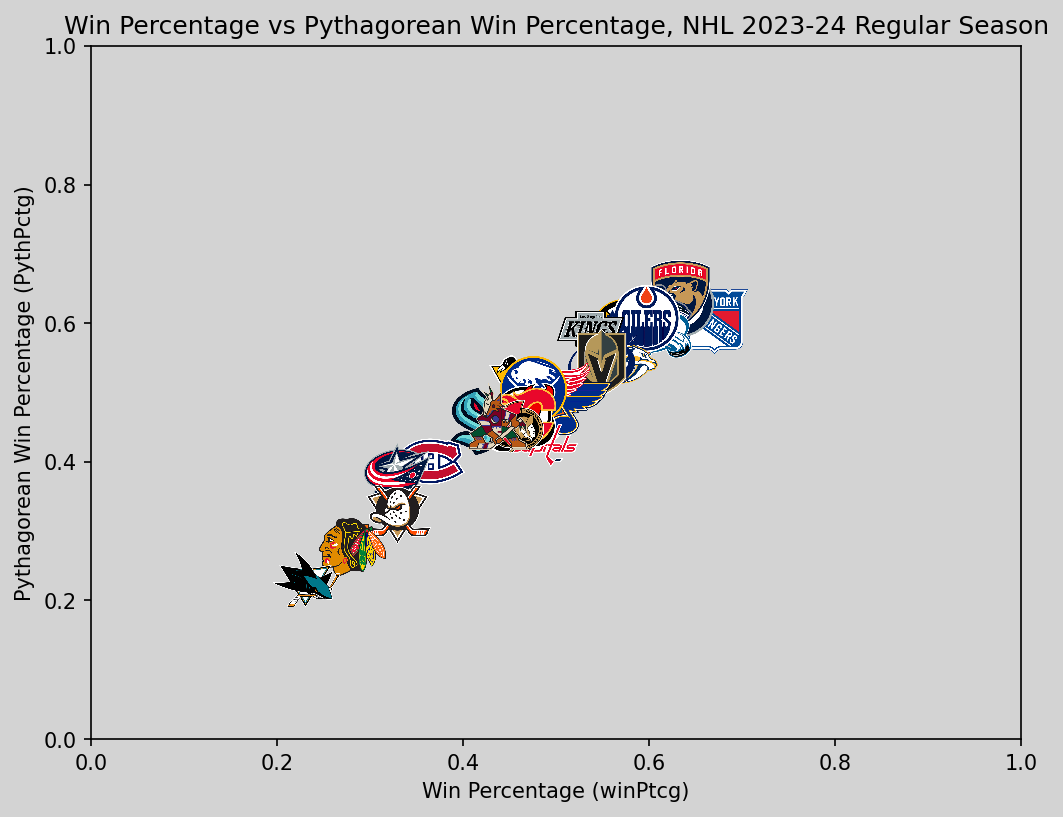

In [144]:
# Create the scatter plot with higher dpi for better resolution
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)  # Increased DPI for better quality

# Set the background color to gray
ax.set_facecolor('lightgray')  # Set plot area background to gray
fig.patch.set_facecolor('lightgray')  # Set figure background to gray

# Loop over the rows in the DataFrame and plot each team's logo at its WinPtcg and PythPctg coordinates
for index, row in NHL_teams.iterrows():
    x, y = row['WinPtcg'], row['PythPctg']
    logo_path = row['espn_logo']
    
    # Load and place each logo image at its respective data point
    ab = AnnotationBbox(get_image_from_url(logo_path, zoom=0.07), (x, y), frameon=False)  # Adjust zoom for clarity
    ax.add_artist(ab)

# Set plot labels and title
ax.set_xlabel('Win Percentage (winPtcg)')
ax.set_ylabel('Pythagorean Win Percentage (PythPctg)')
ax.set_title('Win Percentage vs Pythagorean Win Percentage, NHL 2023-24 Regular Season')

# Set x and y limits to leave space around the logos
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Show the plot
plt.show()

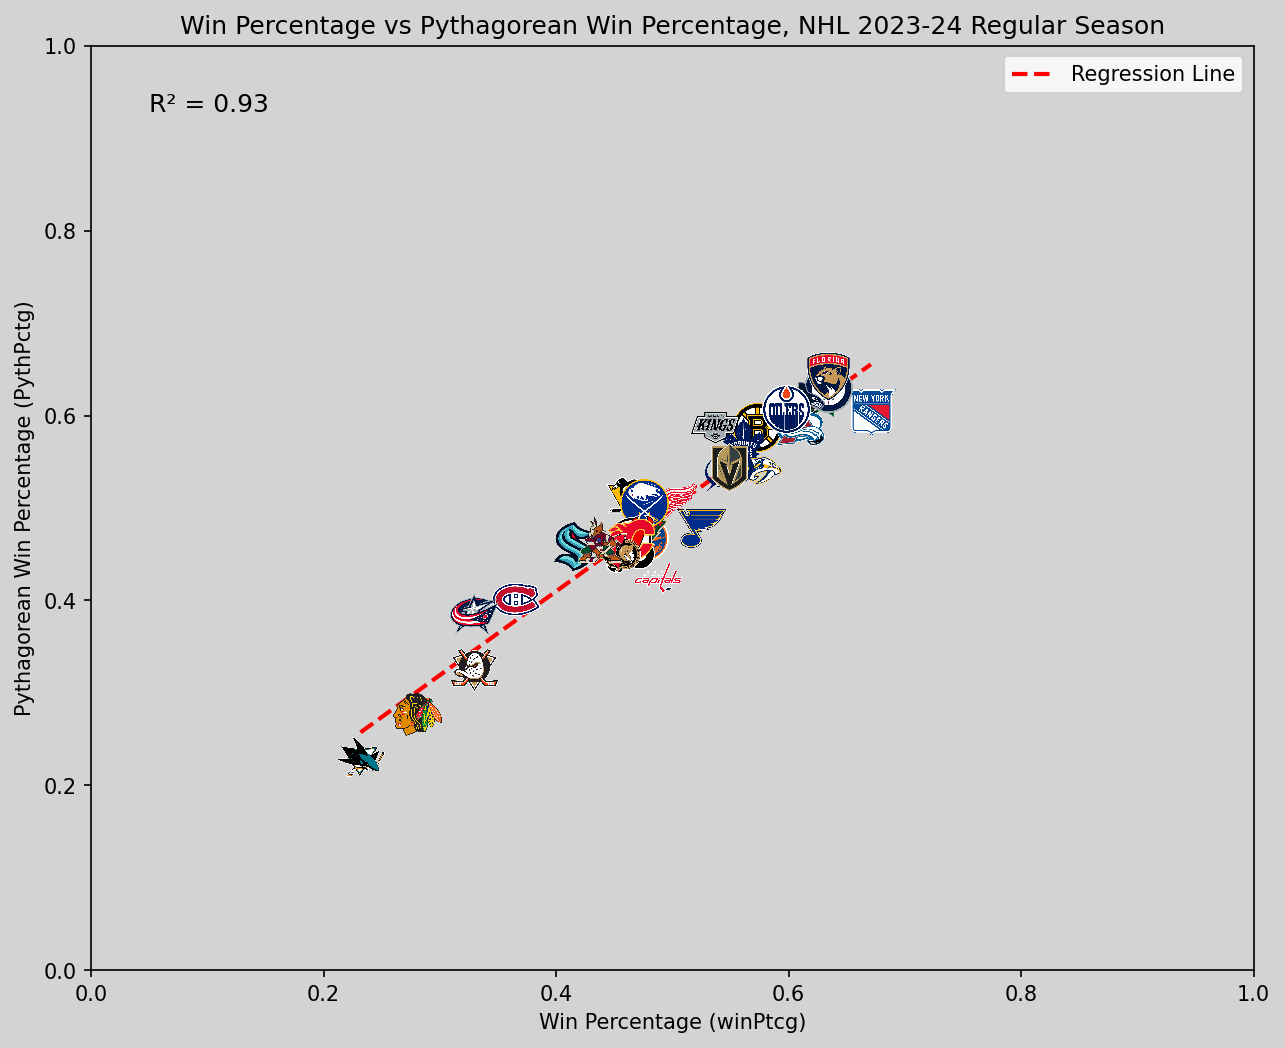

In [145]:
# Create the scatter plot with higher dpi for better resolution
fig, ax = plt.subplots(figsize=(10, 8), dpi=150)  # Increased DPI for better quality

# Set the background color to gray
ax.set_facecolor('lightgray')  # Set plot area background to gray
fig.patch.set_facecolor('lightgray')  # Set figure background to gray

# Extract data for regression
x = NHL_teams['WinPtcg']
y = NHL_teams['PythPctg']

# Fit a linear regression model
slope, intercept = np.polyfit(x, y, 1)
line_x = np.linspace(x.min(), x.max(), 100)  # Generate x values for the regression line
line_y = np.polyval([slope, intercept], line_x)  # Generate y values using the regression equation

# Plot the scatter points
for index, row in NHL_teams.iterrows():
    xi, yi = row['WinPtcg'], row['PythPctg']
    logo_path = row['espn_logo']
    
    # Load and place each logo image at its respective data point
    ab = AnnotationBbox(get_image_from_url(logo_path, zoom=0.05), (xi, yi), frameon=False)  # Reduced zoom for smaller logos
    ax.add_artist(ab)

# Plot the regression line
ax.plot(line_x, line_y, color='red', linestyle='--', linewidth=2, label='Regression Line')

# Calculate R^2 value
y_pred = np.polyval([slope, intercept], x)
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)

# Set plot labels and title
ax.set_xlabel('Win Percentage (winPtcg)')
ax.set_ylabel('Pythagorean Win Percentage (PythPctg)')
ax.set_title('Win Percentage vs Pythagorean Expectation, NHL 2023-24 Regular Season')

# Display R^2 value
ax.text(0.05, 0.95, f'R² = {r2:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top', color='black')

# Set x and y limits to leave space around the logos
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Add legend
ax.legend()

# Show the plot
plt.show()
